In [161]:
#Jericho Herrera



#Observations:
    
    #Observation 1: CNN has a negative, and also the lowest, compound sentiment score. 
     #   It could mean that their tweets have to do with slightly more negative news compared to 
    #    the other media outlets, however, being that it is actually very close to 0, 
    #    (CNN's score being -0.009598 to be exact), 
    #    they could actually just have the most neutral sentiments.
    
    #Observation 2: CBS has the highest compound sentiment score. 
    #    Their news could have more positive sentiments than the other media outlets.
    
    #Observation 3: CNN has never had a tweet (over the past 100 tweets) that has had 
    #    a negative compound sentiment score below -0.75.

In [162]:
import json
import tweepy
import apikeys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [163]:
consumer_key = apikeys.TWITTER_CONSUMER_KEY
consumer_secret = apikeys.TWITTER_CONSUMER_SECRET
access_token = apikeys.TWITTER_ACCESS_TOKEN
access_token_secret = apikeys.TWITTER_ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [164]:
bbc = "@bbc"
cbs = "@cbs"
cnn = "@cnn"
fox = "@FoxNews"
nyt = "@nytimes"

In [165]:
#BBC 


bbc_text_list = []
bbc_date_list = []
bbc_negative_list = []
bbc_neutral_list = []
bbc_positive_list = []
bbc_compound = []


bbc_public_tweets = api.user_timeline(bbc, count = 100)

for bbc_tweet in bbc_public_tweets:
    
    bbc_text = bbc_tweet['text']
    bbc_date = bbc_tweet['created_at']
    
    print(bbc_text)
    
    
    bbc_scores = analyzer.polarity_scores(bbc_text)
    print(bbc_scores)
    print(bbc_date)
    print(' ')
    
    bbc_text_list.append(bbc_text)
    bbc_date_list.append(bbc_date)
    bbc_negative_list.append(bbc_scores['neg'])
    bbc_neutral_list.append(bbc_scores['neu'])
    bbc_positive_list.append(bbc_scores['pos'])
    bbc_compound.append(bbc_scores['compound'])
    


RT @BBCOne: SO. MUCH. CUTE. 😍
#AttenboroughandtheGiantElephant https://t.co/4UyVvh6qBm
{'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.6915}
Sun Dec 10 21:34:02 +0000 2017
 
RT @BBCEarth: 'Never before have we had such an awareness of what we are doing to the planet and never before have we had the power to do s…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sun Dec 10 21:02:27 +0000 2017
 
🌹@DuaLipa performing 'Homesick' was a completely stunning way to end this series of #SLFN. 💖
Watch in full 👉… https://t.co/LgMlMfnv7F
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.4391}
Sun Dec 10 21:00:06 +0000 2017
 
RT @BBCEarth: 'What shocks me ...is how fast things are changing here. We’re headed into uncharted territory' - @expeditionlog
#BluePlanet2…
{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.3818}
Sun Dec 10 20:58:15 +0000 2017
 
RT @BBCOne: If we don’t act, coral reefs could be gone by the end of this century. 😢 #BluePlanet2 https://t.co/OdOSKBtz0S
{'neg':

In [166]:
bbc_complete_df = pd.DataFrame({'Date (BBC)': bbc_date_list, 'Tweet (BBC)': bbc_text_list, 
                                'Negative Score (BBC)': bbc_negative_list, 'Neutral Score (BBC)': bbc_neutral_list, 
                                'Positive Score (BBC)': bbc_positive_list, 'Compound Score (BBC)': bbc_compound})
bbc_final_df = bbc_complete_df[['Date (BBC)', 'Tweet (BBC)', 'Negative Score (BBC)', 'Neutral Score (BBC)', 
                 'Positive Score (BBC)', 'Compound Score (BBC)']]
bbc_final_df.head()


,Date (BBC),Tweet (BBC),Negative Score (BBC),Neutral Score (BBC),Positive Score (BBC),Compound Score (BBC)
0,Sun Dec 10 21:34:02 +0000 2017,RT @BBCOne: SO. MUCH. CUTE. 😍\n#Attenboroughan...,0.000,0.560,0.440,0.6915
1,Sun Dec 10 21:02:27 +0000 2017,RT @BBCEarth: 'Never before have we had such a...,0.000,1.000,0.000,0.0000
2,Sun Dec 10 21:00:06 +0000 2017,🌹@DuaLipa performing 'Homesick' was a complete...,0.000,0.855,0.145,0.4391
3,Sun Dec 10 20:58:15 +0000 2017,RT @BBCEarth: 'What shocks me ...is how fast t...,0.126,0.874,0.000,-0.3818
4,Sun Dec 10 20:57:07 +0000 2017,"RT @BBCOne: If we don’t act, coral reefs could...",0.000,1.000,0.000,0.0000


In [167]:
bbc_compound_df = pd.DataFrame(bbc_compound)
bbc_compound_df.columns = ['BBC Compound Score']
bbc_compound_df.head()

,BBC Compound Score
0,0.6915
1,0.0000
2,0.4391
3,-0.3818
4,0.0000


In [168]:
#CBS

cbs_text_list = []
cbs_date_list = []
cbs_negative_list = []
cbs_neutral_list = []
cbs_positive_list = []
cbs_compound = []


cbs_public_tweets = api.user_timeline(cbs, count = 100)

for cbs_tweet in cbs_public_tweets:
    
    cbs_text = cbs_tweet['text']
    cbs_date = cbs_tweet['created_at']
    
    print(cbs_text)
    
    
    cbs_scores = analyzer.polarity_scores(cbs_text)
    print(cbs_scores)
    print(cbs_date)
    print(' ')
    
    cbs_text_list.append(cbs_text)
    cbs_date_list.append(cbs_date)
    cbs_negative_list.append(cbs_scores['neg'])
    cbs_neutral_list.append(cbs_scores['neu'])
    cbs_positive_list.append(cbs_scores['pos'])
    cbs_compound.append(cbs_scores['compound'])

Due to NFL overrun, CBS is delayed 8 mins in the following ET &amp; CT markets: Hunstville, AL, Bowling Green, KY, MS,… https://t.co/gbwhgooEQd
{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.2263}
Mon Dec 11 00:26:50 +0000 2017
 
Due to NFL overrun CBS is delayed 7 mins in the following ET &amp; CT markets Tampa, Chicago, Maryland, Michigan, Wash… https://t.co/driVgCiX7D
{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.2263}
Mon Dec 11 00:25:54 +0000 2017
 
RT @NoActivityCBS: If you want the intel, you get the tickles. 😂 Stream the first 5 episodes of #NoActivity now: https://t.co/Wzq9bVOhGN ht…
{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0772}
Sun Dec 10 22:49:02 +0000 2017
 
RT @startrekcbs: .@albinokid and @wcruz73 are breaking new ground in #StarTrekDiscovery. 🏳️‍🌈 Stream chapter 1 on CBS All Access: https://t…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sun Dec 10 22:48:46 +0000 2017
 
Don’t miss America’s Game! Stream the Army-Navy game LIVE t

In [169]:
cbs_complete_df = pd.DataFrame({'Date (CBS)': cbs_date_list, 'Tweet (CBS)': cbs_text_list, 
                                'Negative Score (CBS)': cbs_negative_list, 'Neutral Score (CBS)': cbs_neutral_list, 
                                'Positive Score (CBS)': cbs_positive_list, 'Compound Score (CBS)': cbs_compound})
cbs_final_df = cbs_complete_df[['Date (CBS)', 'Tweet (CBS)', 'Negative Score (CBS)', 'Neutral Score (CBS)', 
                 'Positive Score (CBS)', 'Compound Score (CBS)']]
cbs_final_df.head()


,Date (CBS),Tweet (CBS),Negative Score (CBS),Neutral Score (CBS),Positive Score (CBS),Compound Score (CBS)
0,Mon Dec 11 00:26:50 +0000 2017,"Due to NFL overrun, CBS is delayed 8 mins in t...",0.083,0.917,0.000,-0.2263
1,Mon Dec 11 00:25:54 +0000 2017,Due to NFL overrun CBS is delayed 7 mins in th...,0.087,0.913,0.000,-0.2263
2,Sun Dec 10 22:49:02 +0000 2017,"RT @NoActivityCBS: If you want the intel, you ...",0.000,0.936,0.064,0.0772
3,Sun Dec 10 22:48:46 +0000 2017,RT @startrekcbs: .@albinokid and @wcruz73 are ...,0.000,1.000,0.000,0.0000
4,Sat Dec 09 18:24:37 +0000 2017,Don’t miss America’s Game! Stream the Army-Nav...,0.070,0.742,0.189,0.5754


In [170]:
cbs_compound_df = pd.DataFrame(cbs_compound)
cbs_compound_df.columns = ['CBS Compound Score']
cbs_compound_df.head()

,CBS Compound Score
0,-0.2263
1,-0.2263
2,0.0772
3,0.0000
4,0.5754


In [171]:
#CNN

cnn_text_list = []
cnn_date_list = []
cnn_negative_list = []
cnn_neutral_list = []
cnn_positive_list = []
cnn_compound = []


cnn_public_tweets = api.user_timeline(cnn, count = 100)

for cnn_tweet in cnn_public_tweets:
    
    cnn_text = cnn_tweet['text']
    cnn_date = cnn_tweet['created_at']
    
    print(cnn_text)
    
    
    cnn_scores = analyzer.polarity_scores(cnn_text)
    print(cnn_scores)
    print(cnn_date)
    print(' ')
    
    cnn_text_list.append(cnn_text)
    cnn_date_list.append(cnn_date)
    cnn_negative_list.append(cnn_scores['neg'])
    cnn_neutral_list.append(cnn_scores['neu'])
    cnn_positive_list.append(cnn_scores['pos'])
    cnn_compound.append(cnn_scores['compound'])
    

Democratic lawmakers have asked the Treasury Department for documents on financial dealings with Russia… https://t.co/pBmTUHxsAz
{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.2023}
Mon Dec 11 04:00:21 +0000 2017
 
McLaren's 'most extreme' road car costs $1 million https://t.co/a1Unk82nwx https://t.co/yvlL9LCdSq
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mon Dec 11 03:50:08 +0000 2017
 
Venezuelan President Nicolas Maduro has said that some of the main opposition parties will not be allowed to run in… https://t.co/VmN9pU5gEC
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.4019}
Mon Dec 11 03:40:30 +0000 2017
 
These are the most eye-catching photos from 2017 https://t.co/lXgXsyNfa6 https://t.co/Z6N0yRLk60
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mon Dec 11 03:30:12 +0000 2017
 
Heavy snow fell in many parts of the UK on Sunday as Storm Caroline, the biggest storm so far this year, caused wid… https://t.co/R9UCEICrxm
{'neg': 0.0, 'neu': 1.0, 'pos':

In [172]:
cnn_complete_df = pd.DataFrame({'Date (CNN)': cnn_date_list, 'Tweet (CNN)': cnn_text_list, 
                                'Negative Score (CNN)': cnn_negative_list, 'Neutral Score (CNN)': cnn_neutral_list, 
                                'Positive Score (CNN)': cnn_positive_list, 'Compound Score (CNN)': cnn_compound})
cnn_final_df = cnn_complete_df[['Date (CNN)', 'Tweet (CNN)', 'Negative Score (CNN)', 'Neutral Score (CNN)', 
                 'Positive Score (CNN)', 'Compound Score (CNN)']]
cnn_final_df.head()

,Date (CNN),Tweet (CNN),Negative Score (CNN),Neutral Score (CNN),Positive Score (CNN),Compound Score (CNN)
0,Mon Dec 11 04:00:21 +0000 2017,Democratic lawmakers have asked the Treasury D...,0.0,0.886,0.114,0.2023
1,Mon Dec 11 03:50:08 +0000 2017,McLaren's 'most extreme' road car costs $1 mil...,0.0,1.000,0.000,0.0000
2,Mon Dec 11 03:40:30 +0000 2017,Venezuelan President Nicolas Maduro has said t...,0.0,0.881,0.119,0.4019
3,Mon Dec 11 03:30:12 +0000 2017,These are the most eye-catching photos from 20...,0.0,1.000,0.000,0.0000
4,Mon Dec 11 03:25:06 +0000 2017,Heavy snow fell in many parts of the UK on Sun...,0.0,1.000,0.000,0.0000


In [173]:
cnn_compound_df = pd.DataFrame(cnn_compound)
cnn_compound_df.columns = ['CNN Compound Score']
cnn_compound_df.head()

,CNN Compound Score
0,0.2023
1,0.0000
2,0.4019
3,0.0000
4,0.0000


In [174]:
#FOX

fox_text_list = []
fox_date_list = []
fox_negative_list = []
fox_neutral_list = []
fox_positive_list = []
fox_compound = []


fox_public_tweets = api.user_timeline(fox, count = 100)

for fox_tweet in fox_public_tweets:
    
    fox_text = fox_tweet['text']
    fox_date = fox_tweet['created_at']
    
    print(fox_text)
    
    
    fox_scores = analyzer.polarity_scores(fox_text)
    print(fox_scores)
    print(fox_date)
    print(' ')
    
    fox_text_list.append(fox_text)
    fox_date_list.append(fox_date)
    fox_negative_list.append(fox_scores['neg'])
    fox_neutral_list.append(fox_scores['neu'])
    fox_positive_list.append(fox_scores['pos'])
    fox_compound.append(fox_scores['compound'])
    

On @ffweekend, @SheriffClarke slammed Rep. John Lewis for boycotting @POTUS's appearance at a Civil Rights museum i… https://t.co/29ZcytSMHN
{'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'compound': -0.4019}
Mon Dec 11 04:17:05 +0000 2017
 
In his speech at the opening of the Mississippi Civil Rights Museum, @POTUS called for "a future of freedom, equali… https://t.co/CZfZZ60T4a
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.6369}
Mon Dec 11 04:15:02 +0000 2017
 
.@JesseBWatters: "The @FBI, the Department of Justice, and Robert Mueller's crew investigating the Trump campaign h… https://t.co/PjZcl7KdhX
{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5267}
Mon Dec 11 04:14:01 +0000 2017
 
On @WattersWorld, @PressSec Sarah Sanders slammed former President @BarackObama for taking credit for the economy u… https://t.co/y7ShRMmJ9q
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.3818}
Mon Dec 11 04:12:02 +0000 2017
 
On @ffweekend, @GovMikeHuckabee responded to @ChelseaHandler,

In [175]:
fox_complete_df = pd.DataFrame({'Date (Fox)': fox_date_list, 'Tweet (Fox)': fox_text_list, 
                                'Negative Score (Fox)': fox_negative_list, 'Neutral Score (Fox)': fox_neutral_list, 
                                'Positive Score (Fox)': fox_positive_list, 'Compound Score (Fox)': fox_compound})
fox_final_df = fox_complete_df[['Date (Fox)', 'Tweet (Fox)', 'Negative Score (Fox)', 'Neutral Score (Fox)', 
                 'Positive Score (Fox)', 'Compound Score (Fox)']]
fox_final_df.head()

,Date (Fox),Tweet (Fox),Negative Score (Fox),Neutral Score (Fox),Positive Score (Fox),Compound Score (Fox)
0,Mon Dec 11 04:17:05 +0000 2017,"On @ffweekend, @SheriffClarke slammed Rep. Joh...",0.144,0.856,0.000,-0.4019
1,Mon Dec 11 04:15:02 +0000 2017,In his speech at the opening of the Mississipp...,0.000,0.826,0.174,0.6369
2,Mon Dec 11 04:14:01 +0000 2017,".@JesseBWatters: ""The @FBI, the Department of ...",0.000,0.825,0.175,0.5267
3,Mon Dec 11 04:12:02 +0000 2017,"On @WattersWorld, @PressSec Sarah Sanders slam...",0.000,0.860,0.140,0.3818
4,Mon Dec 11 04:07:06 +0000 2017,"On @ffweekend, @GovMikeHuckabee responded to @...",0.176,0.824,0.000,-0.4588


In [176]:
fox_compound_df = pd.DataFrame(fox_compound)
fox_compound_df.columns = ['Fox Compound Score']
fox_compound_df.head()

,Fox Compound Score
0,-0.4019
1,0.6369
2,0.5267
3,0.3818
4,-0.4588


In [177]:
#New York Times

nyt_text_list = []
nyt_date_list = []
nyt_negative_list = []
nyt_neutral_list = []
nyt_positive_list = []
nyt_compound = []


nyt_public_tweets = api.user_timeline(nyt, count = 100)

for nyt_tweet in nyt_public_tweets:
    
    nyt_text = nyt_tweet['text']
    nyt_date = nyt_tweet['created_at']
    
    print(nyt_text)
    
    
    nyt_scores = analyzer.polarity_scores(nyt_text)
    print(nyt_scores)
    print(nyt_date)
    print(' ')
    
    nyt_text_list.append(nyt_text)
    nyt_date_list.append(nyt_date)
    nyt_negative_list.append(nyt_scores['neg'])
    nyt_neutral_list.append(nyt_scores['neu'])
    nyt_positive_list.append(nyt_scores['pos'])
    nyt_compound.append(nyt_scores['compound'])

Your cat tattoo can have your actual cat in it https://t.co/wyrGCMsrld
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mon Dec 11 04:12:09 +0000 2017
 
RT @nytimesworld: Protests in Lebanon near U.S. embassy after Trump’s Jerusalem decision https://t.co/6QjgtAgUVj https://t.co/MVThAPnypJ
{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.2263}
Mon Dec 11 03:53:03 +0000 2017
 
Horror films dominated the cultural conversation in 2017. So @nytmag asked the year's best actors to perform in a s… https://t.co/1zY2LD0VYi
{'neg': 0.143, 'neu': 0.695, 'pos': 0.162, 'compound': 0.128}
Mon Dec 11 03:39:09 +0000 2017
 
RT @nytimesworld: London's Heathrow Airport was brought to a virtual halt on Sunday after a snowstorm swept through the region https://t.co…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mon Dec 11 03:25:04 +0000 2017
 
17 ways to celebrate the season in New York City, from the familiar (Rockettes!) to the far-out (Taylor Mac!) https://t.co/50cu9mc8bC
{'neg': 0.0,

In [178]:
nyt_complete_df = pd.DataFrame({'Date (New York Times)': nyt_date_list, 'Tweet (New York Times)': nyt_text_list, 
                                'Negative Score (New York Times)': nyt_negative_list, 
                                'Neutral Score (New York Times)': nyt_neutral_list, 
                                'Positive Score (New York Times)': nyt_positive_list, 
                                'Compound Score (New York Times)': nyt_compound})
nyt_final_df = nyt_complete_df[['Date (New York Times)', 'Tweet (New York Times)', 
                                'Negative Score (New York Times)', 'Neutral Score (New York Times)', 
                                'Positive Score (New York Times)', 'Compound Score (New York Times)']]
nyt_final_df.head()

,Date (New York Times),Tweet (New York Times),Negative Score (New York Times),Neutral Score (New York Times),Positive Score (New York Times),Compound Score (New York Times)
0,Mon Dec 11 04:12:09 +0000 2017,Your cat tattoo can have your actual cat in it...,0.000,1.000,0.000,0.0000
1,Mon Dec 11 03:53:03 +0000 2017,RT @nytimesworld: Protests in Lebanon near U.S...,0.128,0.872,0.000,-0.2263
2,Mon Dec 11 03:39:09 +0000 2017,Horror films dominated the cultural conversati...,0.143,0.695,0.162,0.1280
3,Mon Dec 11 03:25:04 +0000 2017,RT @nytimesworld: London's Heathrow Airport wa...,0.000,1.000,0.000,0.0000
4,Mon Dec 11 03:13:26 +0000 2017,17 ways to celebrate the season in New York Ci...,0.000,0.816,0.184,0.6467


In [179]:
nyt_compound_df = pd.DataFrame(nyt_compound)
nyt_compound_df.columns = ['New York Times Compound Score']
nyt_compound_df.head()

,New York Times Compound Score
0,0.0000
1,-0.2263
2,0.1280
3,0.0000
4,0.6467


In [180]:
tweet_number = np.arange(1,101)
combined_compound_df = pd.DataFrame({'# Tweet(s) Ago': tweet_number, 'BBC Compound Score': bbc_compound,
                      'CBS Compound Score': cbs_compound,'CNN Compound Score': cnn_compound,
                      'Fox Compound Score': fox_compound,'New York Times Compound Score': nyt_compound})
combined_compound_df.head()

,# Tweet(s) Ago,BBC Compound Score,CBS Compound Score,CNN Compound Score,Fox Compound Score,New York Times Compound Score
0,1,0.6915,-0.2263,0.2023,-0.4019,0.0000
1,2,0.0000,-0.2263,0.0000,0.6369,-0.2263
2,3,0.4391,0.0772,0.4019,0.5267,0.1280
3,4,-0.3818,0.0000,0.0000,0.3818,0.0000
4,5,0.0000,0.5754,0.0000,-0.4588,0.6467


In [181]:
reversed_df = combined_compound_df.sort_index(ascending=False)
reversed_df.head()

,# Tweet(s) Ago,BBC Compound Score,CBS Compound Score,CNN Compound Score,Fox Compound Score,New York Times Compound Score
99,100,0.0000,0.0000,-0.4026,0.0000,0.4939
98,99,0.4939,0.6289,0.8360,0.2732,0.3818
97,98,0.6808,0.9476,0.0000,0.7003,0.0000
96,97,0.0000,0.5106,0.0000,0.4939,0.6369
95,96,0.0000,0.5826,0.0000,-0.8074,0.2023


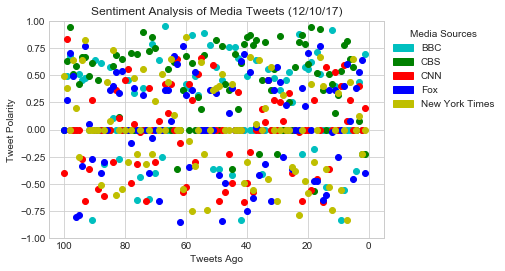

In [182]:
plt.scatter(reversed_df['# Tweet(s) Ago'], reversed_df['BBC Compound Score'], color='c')
plt.scatter(reversed_df['# Tweet(s) Ago'], reversed_df['CBS Compound Score'], color='g')
plt.scatter(reversed_df['# Tweet(s) Ago'], reversed_df['CNN Compound Score'], color='r')
plt.scatter(reversed_df['# Tweet(s) Ago'], reversed_df['Fox Compound Score'], color='b')
plt.scatter(reversed_df['# Tweet(s) Ago'], reversed_df['New York Times Compound Score'], color='y')
plt.xlim([105,-5])
plt.ylim([-1.0, 1.0])
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets (12/10/17)')

bbc_legend = mpatches.Patch(color='c', label='BBC')
cbs_legend = mpatches.Patch(color='g', label='CBS')
cnn_legend = mpatches.Patch(color='r', label='CNN')
fox_legend = mpatches.Patch(color='b', label='Fox')
nyt_legend = mpatches.Patch(color='y', label='New York Times')

plt.legend(handles=[bbc_legend, cbs_legend, cnn_legend, fox_legend, nyt_legend], 
           loc='upper left', bbox_to_anchor=(1,1), title='Media Sources')

sns.set_style("whitegrid")
plt.savefig('Sentiment_Analysis_of_Media_Tweets.png')
plt.show()

In [183]:
means_df = pd.DataFrame({'BBC Compound Score': bbc_compound,
                      'CBS Compound Score': cbs_compound,'CNN Compound Score': cnn_compound,
                      'Fox Compound Score': fox_compound,'New York Times Compound Score': nyt_compound})

means = means_df.mean()
means

BBC Compound Score               0.170004
CBS Compound Score               0.374197
CNN Compound Score              -0.009598
Fox Compound Score               0.059802
New York Times Compound Score    0.022462
dtype: float64

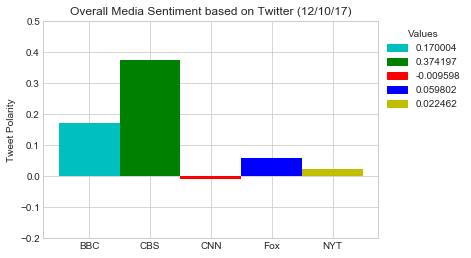

In [184]:
accounts = ['BBC','CBS','CNN', 'Fox', 'NYT']
data = [means['BBC Compound Score'], means['CBS Compound Score'], means['CNN Compound Score'],
        means['Fox Compound Score'], means['New York Times Compound Score']]
labels = [str(means['BBC Compound Score']),str(means['CBS Compound Score']), str(means['CNN Compound Score']), 
          str(means['Fox Compound Score']),str(means['New York Times Compound Score'])]
colors = ['c','g','r','b','y']

plt.bar(accounts, data, color=colors, width = 1)
plt.ylim([-0.20,0.50])
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment based on Twitter (12/10/17)')


bbc_legend = mpatches.Patch(color='c', label= means['BBC Compound Score'])
cbs_legend = mpatches.Patch(color='g', label= means['CBS Compound Score'])
cnn_legend = mpatches.Patch(color='r', label= means['CNN Compound Score'])
fox_legend = mpatches.Patch(color='b', label= means['Fox Compound Score'])
nyt_legend = mpatches.Patch(color='y', label= means['New York Times Compound Score'])

plt.legend(handles=[bbc_legend, cbs_legend, cnn_legend, fox_legend, nyt_legend], 
           loc='upper left', bbox_to_anchor=(1,1), title='Values')
sns.set_style("whitegrid")
plt.savefig('Overall_Media_Sentiment.png')
plt.show()

In [185]:
everything_df = pd.DataFrame({'Date (BBC)': bbc_date_list, 'Tweet (BBC)': bbc_text_list, 
                              'Negative Score (BBC)': bbc_negative_list, 'Neutral Score (BBC)': bbc_neutral_list, 
                              'Positive Score (BBC)': bbc_positive_list, 'Compound Score (BBC)': bbc_compound,
                              'Date (CBS)': cbs_date_list, 'Tweet (CBS)': cbs_text_list, 
                              'Negative Score (CBS)': cbs_negative_list, 'Neutral Score (CBS)': cbs_neutral_list, 
                              'Positive Score (CBS)': cbs_positive_list, 'Compound Score (CBS)': cbs_compound,
                              'Date (CNN)': cnn_date_list, 'Tweet (CNN)': cnn_text_list, 
                              'Negative Score (CNN)': cnn_negative_list, 'Neutral Score (CNN)': cnn_neutral_list, 
                              'Positive Score (CNN)': cnn_positive_list, 'Compound Score (CNN)': cnn_compound,
                              'Date (Fox)': fox_date_list, 'Tweet (Fox)': fox_text_list, 
                              'Negative Score (Fox)': fox_negative_list, 'Neutral Score (Fox)': fox_neutral_list, 
                              'Positive Score (Fox)': fox_positive_list, 'Compound Score (Fox)': fox_compound,
                              'Date (New York Times)': nyt_date_list, 'Tweet (New York Times)': nyt_text_list, 
                              'Negative Score (New York Times)': nyt_negative_list, 
                              'Neutral Score (New York Times)': nyt_neutral_list, 
                              'Positive Score (New York Times)': nyt_positive_list, 
                              'Compound Score (New York Times)': nyt_compound})
last_df = everything_df[['Date (BBC)', 'Tweet (BBC)', 'Negative Score (BBC)', 'Neutral Score (BBC)', 
                          'Positive Score (BBC)', 'Compound Score (BBC)','Date (CBS)', 'Tweet (CBS)', 
                          'Negative Score (CBS)', 'Neutral Score (CBS)', 'Positive Score (CBS)', 
                          'Compound Score (CBS)', 'Date (CNN)', 'Tweet (CNN)', 'Negative Score (CNN)', 
                          'Neutral Score (CNN)', 'Positive Score (CNN)', 'Compound Score (CNN)', 'Date (Fox)', 
                          'Tweet (Fox)', 'Negative Score (Fox)', 'Neutral Score (Fox)', 'Positive Score (Fox)', 
                          'Compound Score (Fox)', 'Date (New York Times)', 'Tweet (New York Times)', 
                          'Negative Score (New York Times)', 'Neutral Score (New York Times)', 
                          'Positive Score (New York Times)', 'Compound Score (New York Times)']]
last_df.head()

,Date (BBC),Tweet (BBC),Negative Score (BBC),Neutral Score (BBC),Positive Score (BBC),Compound Score (BBC),Date (CBS),Tweet (CBS),Negative Score (CBS),Neutral Score (CBS),...,Negative Score (Fox),Neutral Score (Fox),Positive Score (Fox),Compound Score (Fox),Date (New York Times),Tweet (New York Times),Negative Score (New York Times),Neutral Score (New York Times),Positive Score (New York Times),Compound Score (New York Times)
0,Sun Dec 10 21:34:02 +0000 2017,RT @BBCOne: SO. MUCH. CUTE. 😍\n#Attenboroughan...,0.000,0.560,0.440,0.6915,Mon Dec 11 00:26:50 +0000 2017,"Due to NFL overrun, CBS is delayed 8 mins in t...",0.083,0.917,...,0.144,0.856,0.000,-0.4019,Mon Dec 11 04:12:09 +0000 2017,Your cat tattoo can have your actual cat in it...,0.000,1.000,0.000,0.0000
1,Sun Dec 10 21:02:27 +0000 2017,RT @BBCEarth: 'Never before have we had such a...,0.000,1.000,0.000,0.0000,Mon Dec 11 00:25:54 +0000 2017,Due to NFL overrun CBS is delayed 7 mins in th...,0.087,0.913,...,0.000,0.826,0.174,0.6369,Mon Dec 11 03:53:03 +0000 2017,RT @nytimesworld: Protests in Lebanon near U.S...,0.128,0.872,0.000,-0.2263
2,Sun Dec 10 21:00:06 +0000 2017,🌹@DuaLipa performing 'Homesick' was a complete...,0.000,0.855,0.145,0.4391,Sun Dec 10 22:49:02 +0000 2017,"RT @NoActivityCBS: If you want the intel, you ...",0.000,0.936,...,0.000,0.825,0.175,0.5267,Mon Dec 11 03:39:09 +0000 2017,Horror films dominated the cultural conversati...,0.143,0.695,0.162,0.1280
3,Sun Dec 10 20:58:15 +0000 2017,RT @BBCEarth: 'What shocks me ...is how fast t...,0.126,0.874,0.000,-0.3818,Sun Dec 10 22:48:46 +0000 2017,RT @startrekcbs: .@albinokid and @wcruz73 are ...,0.000,1.000,...,0.000,0.860,0.140,0.3818,Mon Dec 11 03:25:04 +0000 2017,RT @nytimesworld: London's Heathrow Airport wa...,0.000,1.000,0.000,0.0000
4,Sun Dec 10 20:57:07 +0000 2017,"RT @BBCOne: If we don’t act, coral reefs could...",0.000,1.000,0.000,0.0000,Sat Dec 09 18:24:37 +0000 2017,Don’t miss America’s Game! Stream the Army-Nav...,0.070,0.742,...,0.176,0.824,0.000,-0.4588,Mon Dec 11 03:13:26 +0000 2017,17 ways to celebrate the season in New York Ci...,0.000,0.816,0.184,0.6467


In [186]:
last_df.to_csv('Media_Sentiment_Scores.csv', encoding='utf-8')